In [5271]:
!pip install plotly
!pip install nbformat>=4.2.0

In [5272]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [5273]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# or
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [5274]:
filepath = '../data/dataset_train.csv'

In [5275]:
df = pd.read_csv(filepath)

In [5276]:
len(df)

1613

In [5277]:
df["label"].value_counts()

sitted      880
standing    733
Name: label, dtype: int64

In [5278]:
def label_wise_records_count(df):
    uniques = df['label'].unique()
    for uniq_val in uniques:
        print(f'{uniq_val}: ', len(df[df['label']==uniq_val]))

label_wise_records_count(df)

sitted:  880
standing:  733


In [5279]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   datetime                      1613 non-null   object 
 1   angle_elbow_r                 1613 non-null   float64
 2   angle_elbow_r_start_angle     1613 non-null   float64
 3   angle_elbow_r_end_angle       1613 non-null   float64
 4   angle_elbow_l                 1613 non-null   float64
 5   angle_elbow_l_start_angle     1613 non-null   float64
 6   angle_elbow_l_end_angle       1613 non-null   float64
 7   angle_underarm_l              1613 non-null   float64
 8   angle_underarm_l_start_angle  1613 non-null   float64
 9   angle_underarm_l_end_angle    1613 non-null   float64
 10  angle_underarm_r              1613 non-null   float64
 11  angle_underarm_r_start_angle  1613 non-null   float64
 12  angle_underarm_r_end_angle    1613 non-null   float64
 13  ang

In [5280]:
df.describe()

,angle_elbow_r,angle_elbow_r_start_angle,angle_elbow_r_end_angle,angle_elbow_l,angle_elbow_l_start_angle,angle_elbow_l_end_angle,angle_underarm_l,angle_underarm_l_start_angle,angle_underarm_l_end_angle,angle_underarm_r,angle_underarm_r_start_angle,angle_underarm_r_end_angle,angle_waist_r,angle_waist_r_start_angle,angle_waist_r_end_angle,angle_waist_l,angle_waist_l_start_angle,angle_waist_l_end_angle,angle_knee_r,angle_knee_r_start_angle,angle_knee_r_end_angle,angle_knee_l,angle_knee_l_start_angle,angle_knee_l_end_angle,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,img_w,img_h,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.0,1613.0,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,198.902842,-268.499251,-69.596409,209.640036,63.321023,-146.319014,304.023323,72.738643,-231.284680,304.466404,-219.243030,85.223374,158.243584,-253.020210,-94.776626,168.703849,88.628097,-80.075752,199.566526,-272.140363,-72.573837,185.644864,94.719335,-90.925530,17.079439,16.861414,263.398137,264.784925,99.363765,96.756362,97.903769,56.925736,58.910337,153.552366,156.717944,127.628722,127.903948,69.103186,38.637142,57.889484,1280.0,720.0,0.998492,0.998335,0.999689,0.999588,0.859206,0.815563,0.818723,0.781303,0.997189,0.996792,0.920750,0.917552,0.909670,0.907046
std,60.942009,69.844408,23.830807,66.774637,97.987100,111.735814,85.359667,28.818857,93.390625,90.264496,93.038902,10.072008,29.164290,29.902378,10.072008,26.786320,33.346749,24.611715,34.955516,18.959962,30.059442,32.336646,18.719231,33.432996,11.146105,12.361997,38.907156,35.148820,27.827545,13.934024,14.310861,20.303184,17.872387,31.723708,29.136740,24.153843,23.078149,14.381045,7.884502,28.807643,0.0,0.0,0.002659,0.002573,0.000627,0.000545,0.177354,0.140247,0.196539,0.177354,0.014454,0.016232,0.093256,0.097245,0.085961,0.087924
min,0.619086,-426.644435,-136.735705,1.282092,-179.012240,-508.706961,0.088946,-169.919402,-287.429863,0.000000,-288.434949,56.645974,73.502677,-442.874984,-123.354026,58.883078,-179.449096,-464.966720,46.187600,-409.398705,-163.610460,51.193905,-179.215175,-419.931417,0.004807,0.015793,157.445704,148.941930,7.018919,45.281353,57.204094,0.295086,0.043259,73.995838,79.794431,43.109965,14.748201,1.056644,0.825618,2.843433,1280.0,720.0,0.974825,0.971843,0.994949,0.995743,0.109882,0.220753,0.072651,0.096791,0.806985,0.770299,0.502092,0.168914,0.488331,0.483405
25%,168.887890,-310.236358,-81.869898,177.905180,51.581945,-126.304497,318.993521,65.056095,-261.662556,323.227063,-258.465379,79.992020,137.809243,-269.356254,-100.007980,154.377439,77.471192,-83.224344,176.521646,-279.462322,-89.356254,174.211116,89.333800,-102.528808,8.253365,8.063049,238.083475,244.751001,83.063485,87.314143,88.477621,46.249995,48.805518,133.202233,136.865015,114.165931,116.179218,63.327746,34.665327,34.207656,1280.0,720.0,0.998434,0.998213,0.999745,0.999450,0.821311,0.741336,0.746907,0.709002,0.998829,0.998415,0.892660,0.888942,0.87

In [5281]:
len(df.columns)

58

In [5282]:
df.drop(['datetime'], axis=1, inplace=True)
len(df.columns)

57

In [5283]:
df.duplicated().sum()

0

In [5284]:
df.head(2)

,angle_elbow_r,angle_elbow_r_start_angle,angle_elbow_r_end_angle,angle_elbow_l,angle_elbow_l_start_angle,angle_elbow_l_end_angle,angle_underarm_l,angle_underarm_l_start_angle,angle_underarm_l_end_angle,angle_underarm_r,angle_underarm_r_start_angle,angle_underarm_r_end_angle,angle_waist_r,angle_waist_r_start_angle,angle_waist_r_end_angle,angle_waist_l,angle_waist_l_start_angle,angle_waist_l_end_angle,angle_knee_r,angle_knee_r_start_angle,angle_knee_r_end_angle,angle_knee_l,angle_knee_l_start_angle,angle_knee_l_end_angle,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,img_w,img_h,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r,label
0,5.724810,-137.862405,-132.137595,319.677864,-72.474432,-392.152295,72.814424,147.847705,75.033280,39.015464,47.862405,86.877870,93.510384,-186.632515,-93.122130,288.780794,-176.185925,-464.966720,272.113648,-278.746162,-6.632515,51.193905,55.007980,3.814075,19.364510,34.517059,194.201906,181.141418,105.237683,109.573689,100.373797,5.017233,3.982158,114.590921,96.391640,57.249970,46.189699,52.209507,29.932159,46.202198,1280,720,0.999747,0.999811,0.999891,0.999428,0.953767,0.266507,0.787393,0.105289,0.999891,0.999856,0.846940,0.168914,0.841725,0.590939,sitted
1,177.258532,-256.373005,-79.114473,230.548466,131.633539,-98.914927,337.427431,81.085073,-256.342357,344.261377,-259.114473,85.146904,166.029041,-260.882137,-94.853096,174.588678,98.246321,-76.342357,176.737106,-257.619243,-80.882137,179.348323,97.594643,-81.753679,10.140457,8.404160,311.842734,264.176135,93.708429,105.683091,106.430805,81.399550,69.333344,187.082641,175.764148,162.911153,114.850688,75.234866,41.579242,44.029883,1280,720,0.988656,0.988864,0.997944,0.998290,0.638160,0.725760,0.576506,0.558999,0.887432,0.881728,0.727772,0.769094,0.688810,0.746854,standing


- 'standing' - 1
- 'sitted' - 0

In [5285]:
df.columns

Index(['angle_elbow_r', 'angle_elbow_r_start_angle', 'angle_elbow_r_end_angle',
       'angle_elbow_l', 'angle_elbow_l_start_angle', 'angle_elbow_l_end_angle',
       'angle_underarm_l', 'angle_underarm_l_start_angle',
       'angle_underarm_l_end_angle', 'angle_underarm_r',
       'angle_underarm_r_start_angle', 'angle_underarm_r_end_angle',
       'angle_waist_r', 'angle_waist_r_start_angle', 'angle_waist_r_end_angle',
       'angle_waist_l', 'angle_waist_l_start_angle', 'angle_waist_l_end_angle',
       'angle_knee_r', 'angle_knee_r_start_angle', 'angle_knee_r_end_angle',
       'angle_knee_l', 'angle_knee_l_start_angle', 'angle_knee_l_end_angle',
       'width_elbow_shoulder_r', 'width_elbow_shoulder_l', 'dist_height_r',
       'dist_height_l', 'dist_width', 'height_shoulder_waist_r',
       'height_shoulder_waist_l', 'height_waist_knee_r', 'height_waist_knee_l',
       'height_knee_shoulder_r', 'height_knee_shoulder_l',
       'height_ankle_waist_r', 'height_ankle_waist_l', 'shoul

In [5286]:
# Drop start and end angles 
def get_cols_without_start_end_angles(df):
    cols_without_start_end_angles = []
    cols_with_start_end_angles = []
    for col in df.columns:
        if "start_angle" in col or "end_angle" in col:
            cols_with_start_end_angles.append(col)
            continue
        cols_without_start_end_angles.append(col)
    return cols_without_start_end_angles, cols_with_start_end_angles

cols_without_start_end_angles, cols_with_start_end_angles = get_cols_without_start_end_angles(df)

In [5287]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
label_encoder.classes_

array(['sitted', 'standing'], dtype=object)

In [5288]:
cols_without_start_end_angles.append('label')
cols_without_start_end_angles.remove('img_w')
cols_without_start_end_angles.remove('img_h')
df[cols_without_start_end_angles].corr()

,angle_elbow_r,angle_elbow_l,angle_underarm_l,angle_underarm_r,angle_waist_r,angle_waist_l,angle_knee_r,angle_knee_l,width_elbow_shoulder_r,width_elbow_shoulder_l,dist_height_r,dist_height_l,dist_width,height_shoulder_waist_r,height_shoulder_waist_l,height_waist_knee_r,height_waist_knee_l,height_knee_shoulder_r,height_knee_shoulder_l,height_ankle_waist_r,height_ankle_waist_l,shoulder_l_r,waist_l_r,knee_l_r,visibility_ear_l,visibility_ear_r,visibility_shoulder_l,visibility_shoulder_r,visibility_elbow_l,visibility_elbow_r,visibility_wrist_l,visibility_wrist_r,visibility_waist_l,visibility_waist_r,visibility_knee_l,visibility_knee_r,visibility_ankle_l,visibility_ankle_r,label,label
angle_elbow_r,1.000000,0.155545,0.161547,0.106499,0.227826,-0.294606,-0.251638,0.254061,-0.058872,-0.012827,0.125688,0.049434,-0.015202,0.058981,0.058451,0.127151,0.009452,0.109219,0.036873,0.137478,0.061103,0.017847,0.061301,0.037543,-0.152744,-0.069436,-0.047003,0.071595,-0.204198,0.255596,-0.106031,0.151995,0.109678,0.123612,-0.008384,0.181754,0.077177,0.191079,-0.015867,-0.015867
angle_elbow_l,0.155545,1.000000,0.224308,0.302843,-0.299328,0.113344,0.288746,-0.186273,0.062839,-0.016746,-0.076085,-0.040072,0.089367,-0.063226,-0.072830,-0.092740,-0.008461,-0.087598,-0.041361,-0.043250,0.003354,0.174706,0.215831,0.170773,0.172619,-0.045373,0.308832,0.009252,0.326920,-0.115973,0.279389,-0.006695,0.138584,0.136605,0.295162,0.115224,0.289173,0.145265,-0.121098,-0.121098
angle_underarm_l,0.161547,0.224308,1.000000,0.552577,-0.189474,-0.121276,0.155444,0.007319,-0.007978,-0.206624,-0.125590,-0.089245,0.129184,-0.154757,-0.202821,-0.107638,-0.034800,-0.130531,-0.113964,-0.070616,-0.026357,0.237032,0.266833,0.157931,0.135493,0.123613,0.268230,0.199203,0.340640,0.187078,0.471007,0.381723,0.018716,0.019246,0.316405,0.319818,0.270743,0.276153,-0.189777,-0.189777
angle_underarm_r,0.106499,0.302843,0.552577,1.000000,-0.246794,-0.079538,0.233954,-0.050895,0.048182,-0.123333,-0.141470,-0.097338,0.185900,-0.138164,-0.191221,-0.136273,-0.047996,-0.147941,-0.122683,-0.089390,-0.025850,0.246997,0.276968,0.175623,0.160316,0.107068,0.272671,0.152845,0.424112,0.101409,0.488606,0.323230,0.025732,0.025431,0.439886,0.282552,0.358880,0.253956,-0.239967,-0.239967
angle_waist_r,0.227826,-0.299328,-0.189474,-0.246794,1.000000,-0.444209,-0.871965,0.434648,-0.032317,-0.187234,0.290105,0.148118,-0.123785,0.277571,0.221178,0.421390,0.224024,0.396984,0.253163,0.244346,0.108337,-0.180130,-0.192877,-0.401651,-0.131573,-0.053531,-0.238908,-0.222179,-0.394626,0.189353,-0.387267,-0.081642,-0.061626,-0.057476,-0.337732,-0.168756,-0.287323,-0.151433,0.430461,0.430461
angle_waist_l,-0.294606,0.113344,-0.121276,-0.079538,-0.444209,1.000000,0.407827,-0.868242,0.021804,-0.010830,-0.067601,0.153258,-0.223120,-0.001323,-0.016590,-0.122023,0.182817,-0.090888,0.095172,-0.117917,0.117014,-0.221728,-0.290947,-0.485988,-0.025731,-0.025573,-0.089144,-0.161680,0.092652,-0.338940,0.031405,-0.251062,-0.078020,-0.082749,-0.191415,-0.366146,-0.163055,-0.366107,0.188763,0.188763
angle_knee_r,-0.251638,0.288746,0.155444,0.233954,-0.871965,0.407827,1.000000,-0.478502,0.126279,0.048701,-0.400766,-0.131252,0.045141,-0.252620,-0.253221,-0.528127,-0.202023,-0.455133,-0.254661,-0.425898,-0.083707,0.139291,0.155418,0.383980,0.142007,0.054960,0.260099,0.245687,0.398389,-0.177135,0.376695,0.106718,0.093184,0.090810,0.368754,0.157566,0.327257,0.136254,-0.434508,-0.434508
angle_knee_l,0.254061,-0.186273,0.007319,-0.050895,0.434648,-0.868242,-0.478502,1.000000,-0.108580,0.084311,0.128500,-0.182239,0.207162,0.016842,0.086411,0.229773,-0.195164,0.164575,-0.071529,0.207850,-0.209457,0.172079,0.222951,0.373092,-0.034477,-0.005483,-0.016886,0.080171,-0.178506,0.253328,-0.136498,0.127784,0.041571,0.047214,0.012118,0.222626,-0.059331,0.230373,-0.110340,-0.110340
width_elbow_shoulder_r,-0.058872,0.062839,-0.007978,0.048182,-0.032317,0.021804,0.126279,-0.108580,1.000000,0.153222,0.036138,0.107248,0.312226,0.103364,0.000870,-0.1059

In [5289]:
corr_df = df.corr()['label']
corr_df#[(corr_df > 0.5) | (corr_df<-0.5)]

angle_elbow_r                  -0.015867
angle_elbow_r_start_angle      -0.017271
angle_elbow_r_end_angle        -0.091196
angle_elbow_l                  -0.121098
angle_elbow_l_start_angle      -0.060710
angle_elbow_l_end_angle         0.019130
angle_underarm_l               -0.189777
angle_underarm_l_start_angle    0.097109
angle_underarm_l_end_angle      0.203424
angle_underarm_r               -0.239967
angle_underarm_r_start_angle    0.252288
angle_underarm_r_end_angle      0.179915
angle_waist_r                   0.430461
angle_waist_r_start_angle      -0.359236
angle_waist_r_end_angle         0.179915
angle_waist_l                   0.188763
angle_waist_l_start_angle       0.151520
angle_waist_l_end_angle        -0.000145
angle_knee_r                   -0.434508
angle_knee_r_start_angle        0.213025
angle_knee_r_end_angle         -0.370916
angle_knee_l                   -0.110340
angle_knee_l_start_angle        0.057544
angle_knee_l_end_angle          0.138941
width_elbow_shou

In [5290]:
coorelated_features_to_drop = [
    # 'angle_knee_r',             # corelated with angle in waist and required ankle for appropriate calculation
    'angle_knee_l',             # corelated with angle in waist and required ankle for appropriate calculation
    'dist_height_r',            # corelated and required ankle for appropriate calculation
    'dist_height_l',            # corelated and required ankle for appropriate calculation
    # 'height_knee_shoulder_r',   # corelated with height_waist_knee_r/l
    'height_knee_shoulder_l',   # corelated with height_waist_knee_r/l
    # 'height_ankle_waist_r',     # corelated with height_waist_knee_r/l
    # 'height_ankle_waist_l',     # corelated with height_waist_knee_r/l
    # 'dist_width',               # corelated with shoulder_l_r
    # 'waist_l_r',                # corelated with shoulder_l_r
    'visibility_waist_r',       # corelated with visibility_waist_l
    'visibility_wrist_l',       # corelated with visibility_elbow_l
    'visibility_wrist_r',       # corelated with visibility_elbow_r
    'visibility_ankle_l',       # corelated with visibility_knee_l	
    'visibility_ankle_r',       # corelated with visibility_knee_r	
]
less_important_features = [
    'visibility_ear_r',
    'visibility_ear_l',
]

columns_to_drop = ['img_w', 'img_h', *coorelated_features_to_drop, *less_important_features, *cols_with_start_end_angles]

In [5291]:
feature_pairs_for_mean = [
    ('height_shoulder_waist_r', 'height_shoulder_waist_l'),
    ('height_waist_knee_r', 'height_waist_knee_l'),
]

In [5292]:
df.drop(columns_to_drop, axis=1, inplace=True)
df.columns

Index(['angle_elbow_r', 'angle_elbow_l', 'angle_underarm_l',
       'angle_underarm_r', 'angle_waist_r', 'angle_waist_l', 'angle_knee_r',
       'width_elbow_shoulder_r', 'width_elbow_shoulder_l', 'dist_width',
       'height_shoulder_waist_r', 'height_shoulder_waist_l',
       'height_waist_knee_r', 'height_waist_knee_l', 'height_knee_shoulder_r',
       'height_ankle_waist_r', 'height_ankle_waist_l', 'shoulder_l_r',
       'waist_l_r', 'knee_l_r', 'visibility_shoulder_l',
       'visibility_shoulder_r', 'visibility_elbow_l', 'visibility_elbow_r',
       'visibility_waist_l', 'visibility_knee_l', 'visibility_knee_r',
       'label'],
      dtype='object')

In [5293]:
import matplotlib.pyplot as plt
import math

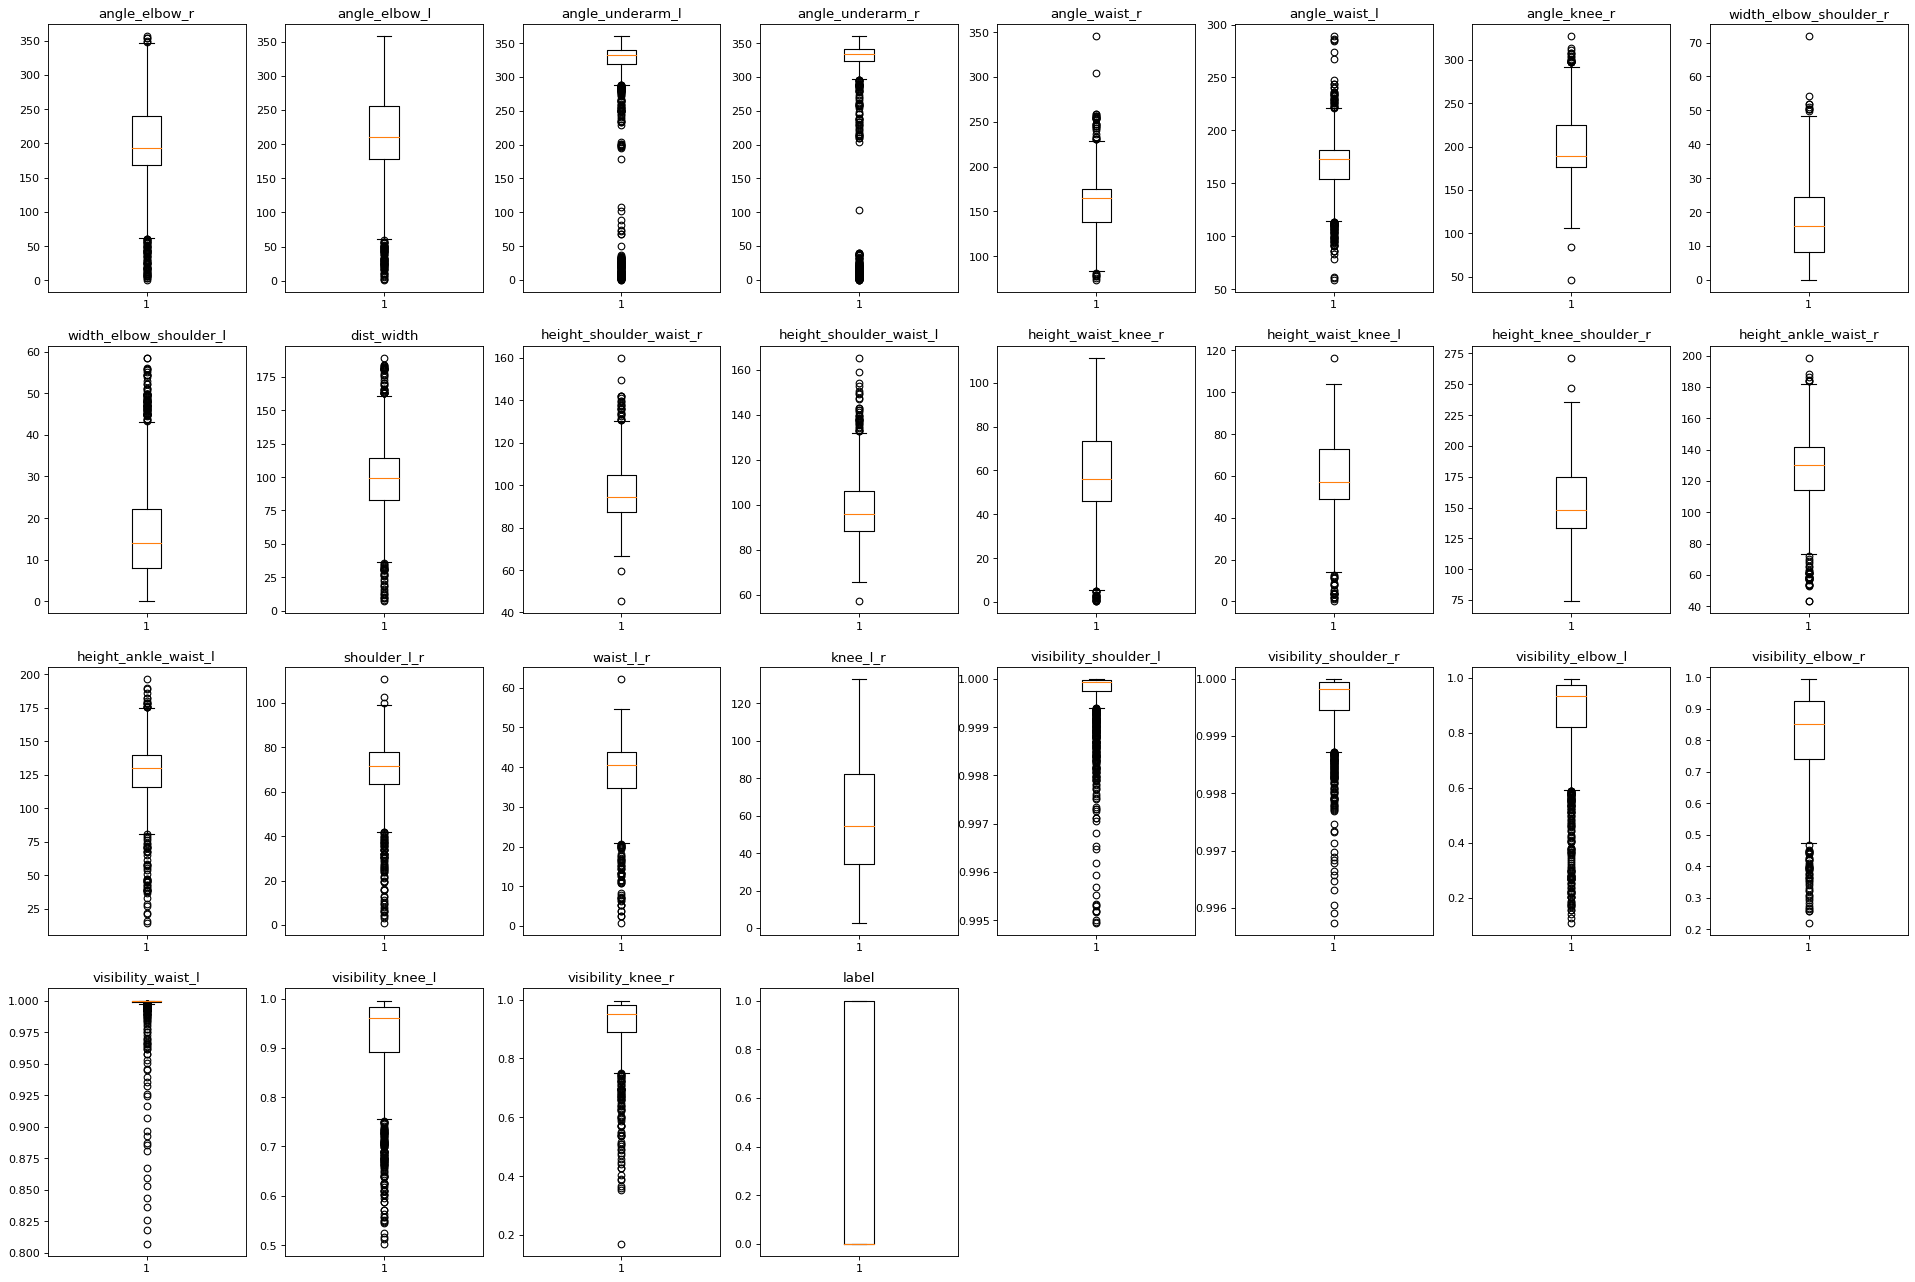

In [5294]:
def box_plot(df):
    features = list(df.columns)
    n_features = len(features)
    n_cols = 8
    n_rows = math.ceil(n_features/n_cols)

    plt.figure(figsize=(30, 20), dpi=80)

    for idx, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, idx+1)
        plt.boxplot(df[feature])
        plt.title(feature)
    plt.show()


box_plot(df)

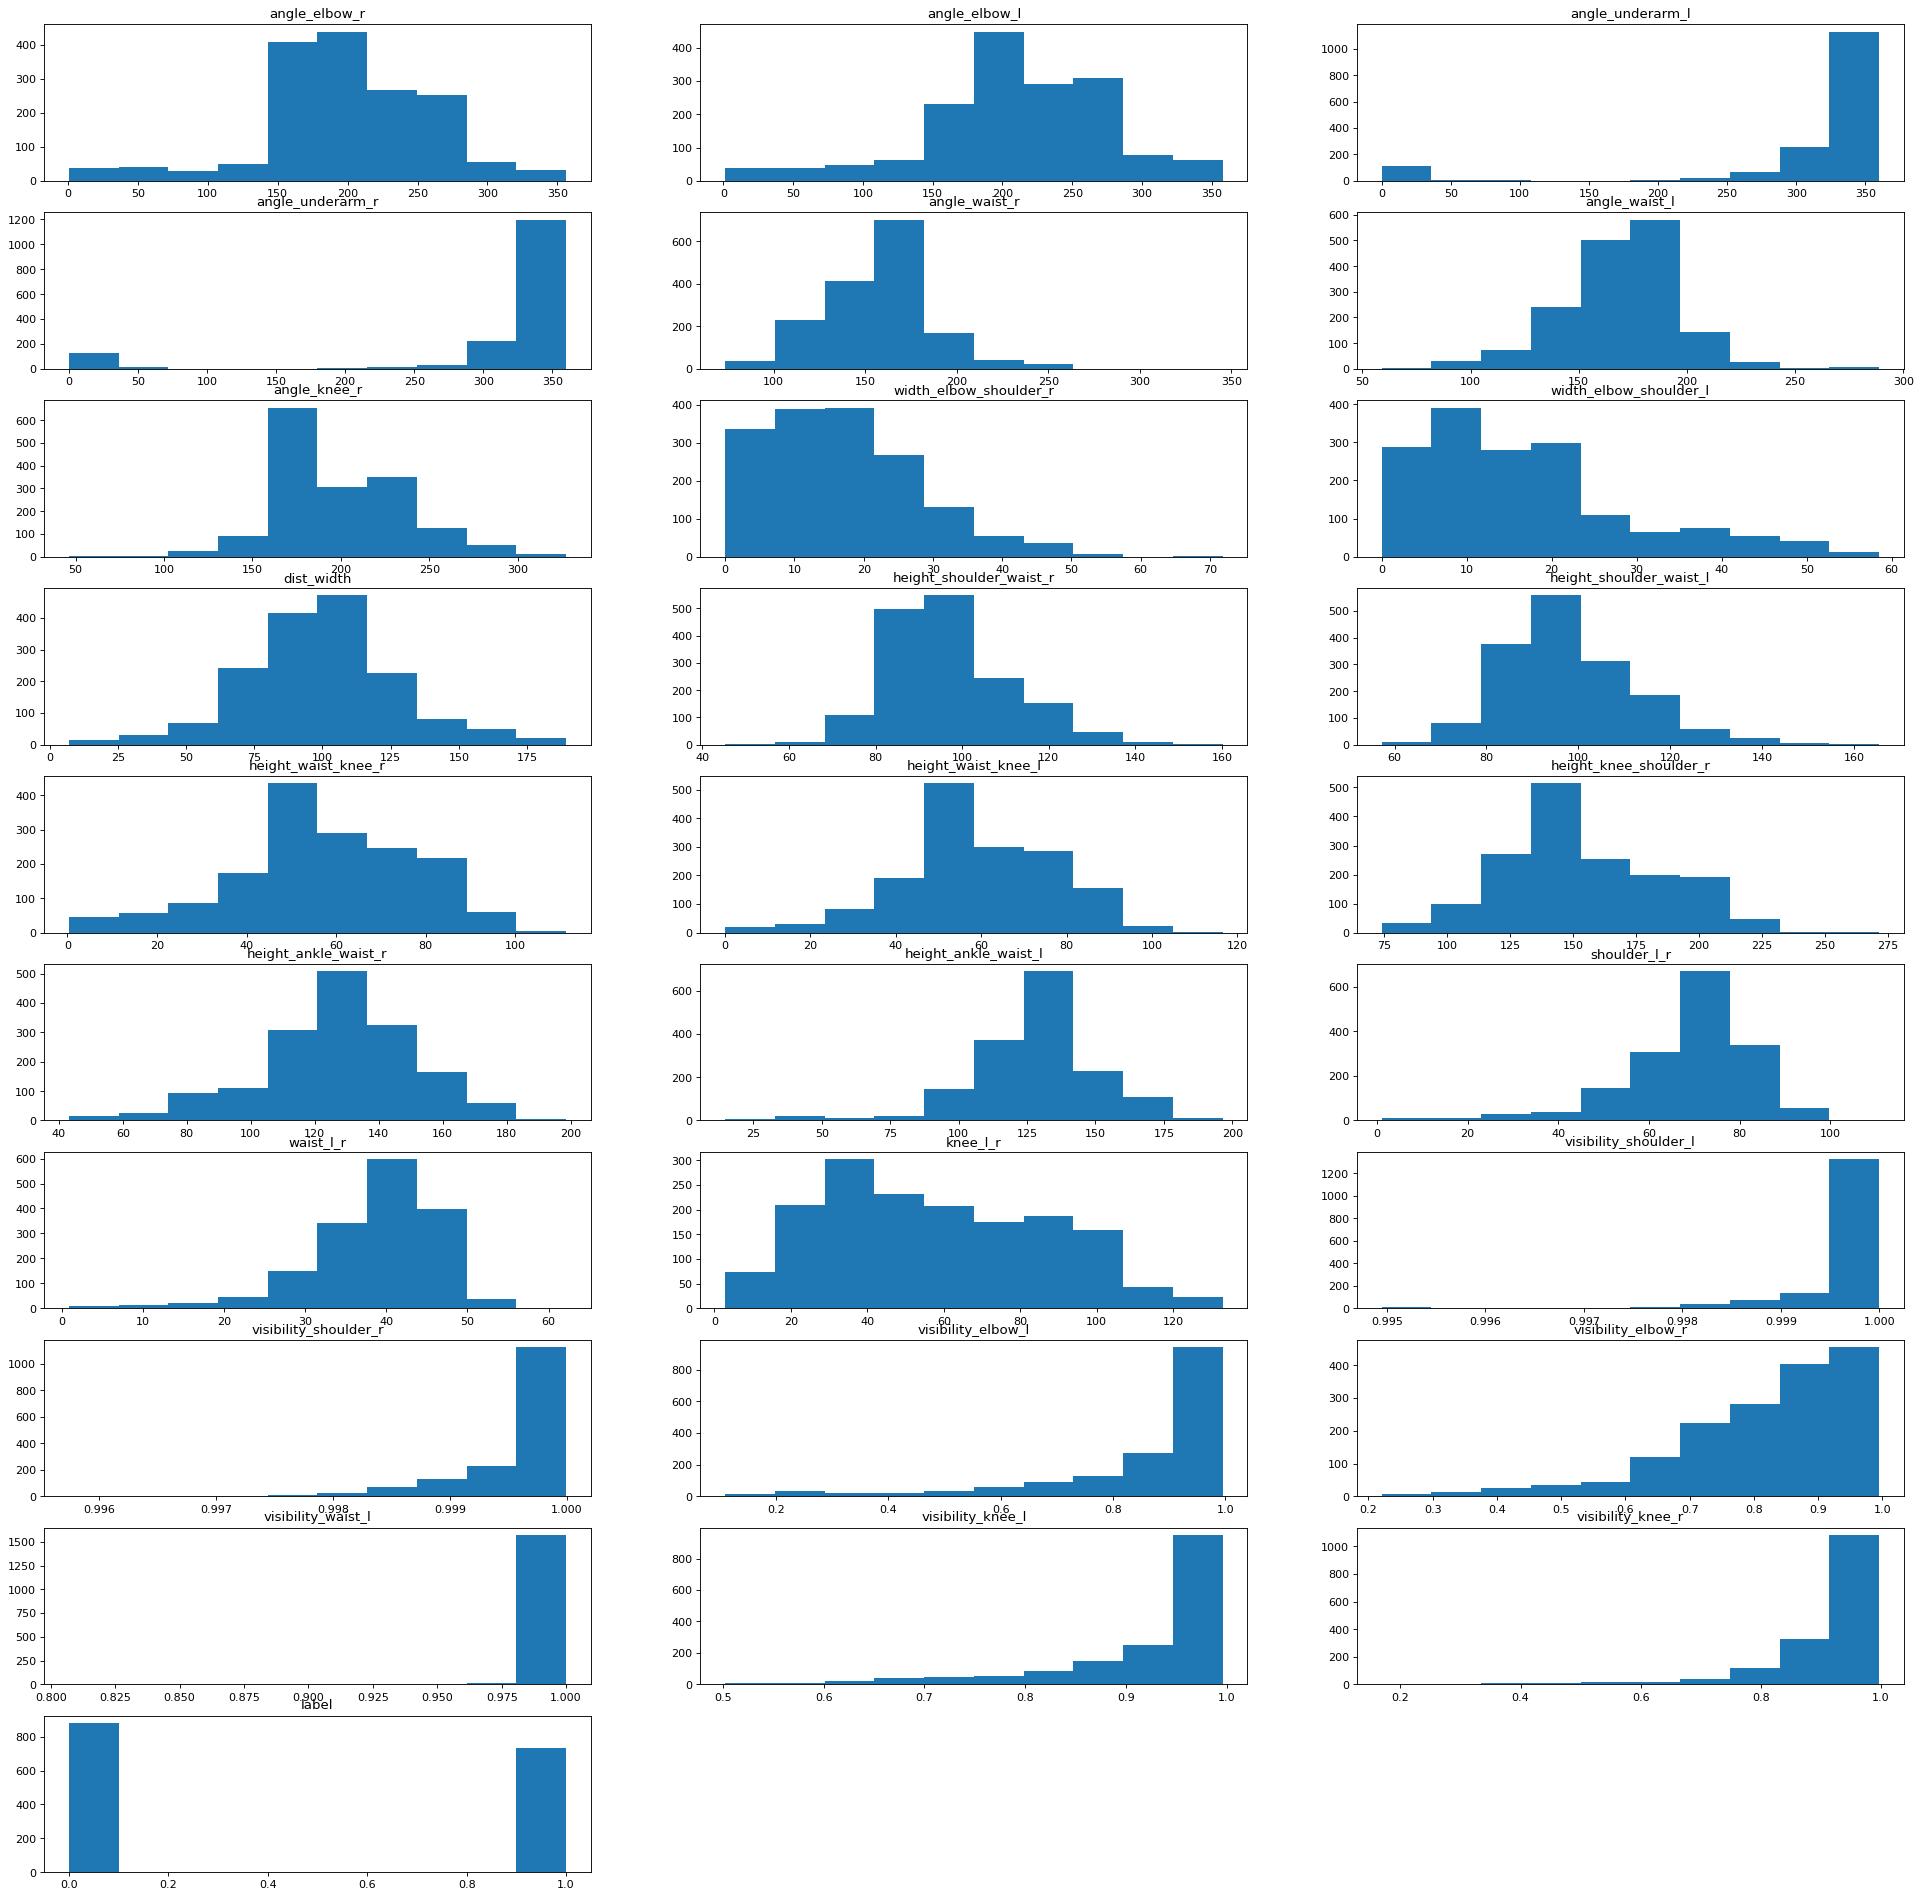

In [5295]:
def histogram_plot(df):
    features = list(df.columns)
    n_features = len(features)
    n_cols = 3
    n_rows = math.ceil(n_features/n_cols)

    plt.figure(figsize=(30, 30), dpi=80)

    for idx, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, idx+1)
        plt.hist(df[feature])
        plt.title(feature)
    plt.show()


histogram_plot(df)

In [5296]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [5297]:
def find_relation(df, x, y, title=''):
    fig = px.box(
        df, 
        x=x, 
        y=y,  
        # color=x, 
        title=title, 
        color_discrete_map={
            0:'Sitted',
            1:'Standing'
        }
    )
    fig.update_traces(quartilemethod="exclusive")
    fig.show()


In [5298]:
find_relation(df, 'label', 'angle_elbow_r')

In [5299]:
find_relation(df, 'label', 'angle_elbow_l')

In [5300]:
find_relation(df, 'label', 'angle_underarm_l')

In [5301]:
find_relation(df, 'label', 'angle_underarm_r')

In [5302]:
find_relation(df, 'label', 'angle_waist_r')

In [5303]:
find_relation(df, 'label', 'angle_waist_l')

In [5304]:
# find_relation(df, 'label', 'angle_knee_r')

In [5305]:
# find_relation(df, 'label', 'angle_knee_l')

In [5306]:
# find_relation(df, 'label', 'dist_height_r')

In [5307]:
# find_relation(df, 'label', 'dist_height_l')

In [5308]:
# find_relation(df, 'label', 'dist_width')

In [5309]:
find_relation(df, 'label', 'height_shoulder_waist_r')

In [5310]:
find_relation(df, 'label', 'height_shoulder_waist_l')

In [5311]:
find_relation(df, 'label', 'height_waist_knee_r')

In [5312]:
find_relation(df, 'label', 'height_waist_knee_l')

In [5313]:
# find_relation(df, 'label', 'height_knee_shoulder_r')

In [5314]:
# find_relation(df, 'label', 'height_knee_shoulder_l')

In [5315]:
# find_relation(df, 'label', 'height_ankle_waist_r')

In [5316]:
find_relation(df, 'label', 'shoulder_l_r')

In [5317]:
# find_relation(df, 'label', 'waist_l_r')

In [5318]:
find_relation(df, 'label', 'knee_l_r')

In [5319]:
# find_relation(df, 'label', 'visibility_ear_r')

In [5320]:
# find_relation(df, 'label', 'visibility_ear_l')

In [5321]:
find_relation(df, 'label', 'visibility_shoulder_l')

In [5322]:
find_relation(df, 'label', 'visibility_shoulder_r')

In [5323]:
# find_relation(df, 'label', 'visibility_wrist_r')

In [5324]:
# find_relation(df, 'label', 'visibility_wrist_l')

In [5325]:
# find_relation(df, 'label', 'visibility_waist_r')

In [5326]:
find_relation(df, 'label', 'visibility_waist_l')

In [5327]:
find_relation(df, 'label', 'visibility_knee_r')

In [5328]:
find_relation(df, 'label', 'visibility_knee_l')

In [5329]:
# find_relation(df, 'label', 'visibility_ankle_r')

In [5330]:
# find_relation(df, 'label', 'visibility_ankle_l')

In [5331]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5332]:
X, y = df.drop(['label'], axis=1), df['label']

In [5333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
len(y_train) - (lbl_1 := y_train.sum()), lbl_1, len(y_test)-(lbl_1:=y_test.sum()), lbl_1

(660, 549, 220, 184)

In [5334]:
logistic_model = LogisticRegression(max_iter=586)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=586)

In [5335]:
logistic_model_2 = LogisticRegression(max_iter=807)
logistic_model_2.fit(X, y)

LogisticRegression(max_iter=807)

In [5336]:
predictions = logistic_model.predict(X_test)
accuracy_score(y_test, predictions)

0.9975247524752475

In [5337]:
confusion_matrix(y_test, predictions)

array([[220,   0],
       [  1, 183]], dtype=int64)

In [5338]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       220\n           1       1.00      0.99      1.00       184\n\n    accuracy                           1.00       404\n   macro avg       1.00      1.00      1.00       404\nweighted avg       1.00      1.00      1.00       404\n'

In [5339]:
## Prediction on new test set
df_test = pd.read_csv('../data/dataset-test.csv')
df_test.drop('datetime', axis=1, inplace=True)

In [5340]:
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [5341]:
df_test['label'] = label_encoder.fit_transform(df_test['label'])
label_encoder.classes_

array(['sitted', 'standing'], dtype=object)

In [5342]:
x_test_2 = df_test.drop('label', axis=1)
y_test_2 = df_test['label']
len(x_test_2), len(y_test_2)

(277, 277)

In [5343]:
predictions = logistic_model.predict(x_test_2)
predictions_2 = logistic_model_2.predict(x_test_2)
accuracy_score(y_test_2, predictions), accuracy_score(y_test_2, predictions_2)

(0.9386281588447654, 0.9422382671480144)

In [5344]:
confusion_matrix(y_test_2, predictions), confusion_matrix(y_test_2, predictions_2)

(array([[114,   1],
        [ 16, 146]], dtype=int64),
 array([[110,   5],
        [ 11, 151]], dtype=int64))

In [5345]:
label_encoder.classes_

array(['sitted', 'standing'], dtype=object)

In [5346]:
classification_report(y_test_2, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.99      0.93       115\n           1       0.99      0.90      0.94       162\n\n    accuracy                           0.94       277\n   macro avg       0.94      0.95      0.94       277\nweighted avg       0.94      0.94      0.94       277\n'

In [5347]:
classification_report(y_test_2, predictions_2)

'              precision    recall  f1-score   support\n\n           0       0.91      0.96      0.93       115\n           1       0.97      0.93      0.95       162\n\n    accuracy                           0.94       277\n   macro avg       0.94      0.94      0.94       277\nweighted avg       0.94      0.94      0.94       277\n'

In [5348]:
from sklearn.tree import DecisionTreeClassifier

In [5349]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X, y)

DecisionTreeClassifier()

In [5350]:
predictions = dec_tree_model.predict(x_test_2)

In [5351]:
accuracy_score(y_test_2, predictions)

0.7472924187725631

In [5352]:
confusion_matrix(y_test_2, predictions)

array([[ 45,  70],
       [  0, 162]], dtype=int64)

In [5353]:
from sklearn.ensemble import RandomForestClassifier

In [5354]:
rf_model = RandomForestClassifier(3, max_depth=3)
rf_model.fit(X, y)
predictions = rf_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.6895306859205776

In [5355]:
confusion_matrix(y_test_2, predictions)

array([[ 29,  86],
       [  0, 162]], dtype=int64)

In [5356]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X, y)
predictions = gaussian_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.5992779783393501

In [5357]:
confusion_matrix(y_test_2, predictions)

array([[  4, 111],
       [  0, 162]], dtype=int64)

In [5358]:
from sklearn.naive_bayes import BernoulliNB 
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X, y)
predictions = bernoulli_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.4151624548736462

In [5359]:
confusion_matrix(y_test_2, predictions)

array([[115,   0],
       [162,   0]], dtype=int64)

In [5360]:
from sklearn.naive_bayes import ComplementNB  
complement_model = ComplementNB()
complement_model.fit(X, y)
predictions = complement_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.631768953068592

In [5361]:
confusion_matrix(y_test_2, predictions)

array([[ 13, 102],
       [  0, 162]], dtype=int64)

In [5362]:
from sklearn.naive_bayes import MultinomialNB  
multinomial_model = MultinomialNB()
multinomial_model.fit(X, y)
predictions = multinomial_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.631768953068592

In [5363]:
confusion_matrix(y_test_2, predictions)

array([[ 13, 102],
       [  0, 162]], dtype=int64)

In [5364]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X, y)
predictions = SVC_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.7978339350180506

In [5365]:
from sklearn.svm import NuSVC
SVC_model = NuSVC()
SVC_model.fit(X, y)
predictions = SVC_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

0.6389891696750902

In [5366]:
from sklearn.svm import LinearSVC
SVC_model = LinearSVC(max_iter=30)
SVC_model.fit(X, y)
predictions = SVC_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

e:\Anaconda-Environments\TF\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

e:\Anaconda-Environments\TF\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.924187725631769

In [5367]:
confusion_matrix(y_test_2, predictions)

array([[ 94,  21],
       [  0, 162]], dtype=int64)

In [5390]:
from sklearn.linear_model import SGDClassifier
SGD_model = SGDClassifier(early_stopping=True, random_state=2)
SGD_model.fit(X, y)
predictions = SGD_model.predict(x_test_2)
accuracy_score(y_test_2, predictions)

1.0

In [5403]:
confusion_matrix(y_test_2, predictions)

array([[115,   0],
       [  0, 162]], dtype=int64)

In [5405]:
import joblib
import os

model_path = '../atm/saved_model/sgd_model.pkl'
os.makedirs(os.path.dirname(model_path))
joblib.dump(SGD_model, model_path)

['../atm/saved_model/sgd_model.pkl']